# Несколько слов про tool-блоки в домашках

Классного датасаентиста помимо всего прочего отличает его "портфель" - набор готового кода на все случаи жизни,
    который он носит с собой где бы он ни работал и какую бы домашку не делал. Во время различных профессиональных занятий
    всегда хорошо сохранить функцию, которая помогла вам сейчас решить конкретную задачу себе "в папочку", чтобы столкнувшись
    с такой / похожей задачей дальше, иметь под рукой oneliner, который сделает все так, как вам хочется.
    
Время от времени в ваших домашках будут появляться tool-блоки, в которых мы будем просить вас написать что-нибудь, что вам
    пригодится в дальнейшем, а также закрепляет пройденный материал.
    Настоятельно рекомендуем завести себе хранилище, куда вы будете складывать функции из домашек,
    а также те, которые напишете сами и сочтете достойными.

В дальнейшем вы сможете импортировать ваши функции в любой проект, например, так:

`import sys` <br>
`sys.path.append('/*SOME_PATH*/my_code/my_utils')` <br>
`from utils.plot import plot_denisty` <br>

<br>    
Скорее всего, со временем вы захотите дополнить / исправить / переделать под себя эти функции, и это правильно,
    однако в домашках нужно сделать ровно то, что написано в задании - ни больше, ни меньше. Все остальное - уже самостоятельно.
    Можно воспринимать функции из домашек как шаблоны, вдохновляющие вас на дальнейшее творчество.
    Чтобы вы в будущем могли разобраться, что происходит у вас в коде (а тем более - проверяющие), мы будем просить вас писать
    комментарии к вашему коду и докстринги (пример ниже). Это несложная и очень полезная привычка, которая не раз выручит вас.

Условия проверки tool-блоков:
- Если какая-то часть задания не реализована или вы сделали что-то запрещенное, вы получаете 0 баллов за задачу
- Если сделано все, что описано в задании и не сделано ничего запрещенного, есть docstring и комментарии к коду,
    вы получаете полный балл за задачу
- После получения полного балла, могут быть вычтены баллы за любого рода неадекватность. Размер штрафа субъективен
    и коррелирует с масштабом неадекватности - на что-то можно закрыть глаза, на что-то не получится.
- Вспомогательные принты и любые следы тестирования - неадекватность
- Неадекватностью может являться кривое выполнение пункта задания, однако если мы посчитаем пункт кривым,
    это не значит, что у вас 0 за задачу. Не сделать и сделать неправильно - разные вещи
- Некоторые советы и намеки на то, что считается адекватным для конкретной задачи, можно будет найти в задании :)

В данной домашке вам предлагается реализовать две функции на датасете титаник, немного измененном следующим образом:

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic/train.csv')
df.Embarked.replace('Q', '', inplace=True)
df.PassengerId = df.PassengerId.astype('string')

## tool: информация о колонках датафрейма (4 балла)

#### чтобы получить полный балл, нужно прикрепить ваш правильно работающий пример в отдельном окошке

Напишите функцию `get_df_info`, которая будет выводить информацию о колонках входного датафрейма. Функция должна возвращать датафрейм следующего формата:

- индекс - все колонки входного датафрейма


- в колонках результирующего датафрейма содержится следующая информация (см. пример ниже):
    - тип данных
        - используйте `df.col.dtype.name`, это стабильнее, чем `df.col.dtype`
    - количество уникальных элементов
        - включая наны
    - доля нанов в колонке
    - доля нулей в колонке
    - доля пустых строк в колонке
    - доля самого частовстречаемого элемента в колонке + сам этот элемент (aka `vc_max`)
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        - если таких несколько - можно брать любой
        
    - два разных примера содержимого колонки
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        
    - `trash_score` колонки: max([суммарная доля нанов, нулей и пустых строк], [`vc_max`.доля if `vc_max`.доля > thr else 0])
        - thr нужно принимать в качестве аргумента функции, поставив по умолчанию что-то адекватное
      
      
- про адекватность
    - нужно сделать так, чтобы как можно больше выводимой вами информации было понятно глазу без доп. усилий
    - округляйте до трех знаков доли
    - выводите чистый 0 спецсимволом, чтобы не путать с округлившимся 0.00001 (напр. '' или -1)
    - если нужно, выводите числа в виде строк
    - убедитесь, что в случае когда двух примеров не набирается, вы можете отличить информацию "примера нет" от пустой строки
    - можете использовать доп. символы, чтобы отличать колонки быстрее, где нужно (напр. 'z:', 'n:', 'e:')
    - обрабатывайте любые другие возникающие неадекватные ситуации и приводите их в адекватный вид :)
    
    
- запрещено: итерироваться по строкам входного датафрейма в любом виде (по колонкам можно)

In [4]:
def get_df_info(df: pd.DataFrame, /, thr=0.5, *args, **kwargs) -> pd.DataFrame:
    '''
    Описание:
    Функция выводит статистику о колонках датафрейма в виде датафрейма.
    Результат содержит информацию о типе данных, об уникальных значениях,
    о количестве NaN, нулей и пустых строк,
    о максимальном значении и его частоте,
    два различных примера данных,
    степень адекватности фичи.
    ...

    df: исходный датафрейм,
    thr: граничное значения для опредления адекватность фичи.
    ...

    returns: pd.DataFrame со сборной информацией о датафрейме.
    '''
    
    df_size = df.shape[0]
    columns = df.columns
    numeric_columns = df.select_dtypes(np.number).columns
    string_columns = np.concatenate((df.select_dtypes('string').columns, df.select_dtypes('object').columns))
    result_columns = ["datatype", "nunique", "nan", "zero", "empty_str", "vc_max", "vc_max_freq", "example_1", "example_2", "trash_score"]
    result_dict = dict(zip(result_columns, [[] for _ in range(len(result_columns))]))
    
    for column in columns:
        
        result_dict["datatype"].append(df[column].dtype.name)
        result_dict["nunique"].append(df[column].unique().size)
        
        tmp = df[column].isna().sum()
        push_nan_tmp = tmp / df_size
        push = f"n: {push_nan_tmp: 0.3f}" if tmp > 0 else "-1"
        result_dict["nan"].append(push)

        tmp = column in numeric_columns
        if tmp:
            tmp = df[column].eq(0).sum()
            push_zero_tmp = tmp / df_size
            push = f"z: {push_zero_tmp: 0.3f}" if tmp > 0 else "-1"
        else:
            push_zero_tmp = 0
            push = "-1"
        result_dict["zero"].append(push)

        tmp = column in string_columns
        if tmp:
            tmp = df[column].eq("").sum()
            push_empty_str_tmp = tmp / df_size
            push = f"e: {push_empty_str_tmp: 0.3f}" if tmp > 0 else "-1"
        else:
            push_empty_str_tmp = 0
            push = "-1"
        result_dict["empty_str"].append(push)

        push = df[column].value_counts(dropna=True)
        push_index = push.index[0]
        push_freq = push.values[0]
        result_dict["vc_max"].append(push_index)
        push_vc_max_freq_tmp = push_freq / df_size
        result_dict["vc_max_freq"].append(f"n: {push_vc_max_freq_tmp: 0.3f}")

        tmp = df[column].dropna().unique()
        match tmp.size:
            case 0:
                push = 2 * ["No example"]
            case 1:
                push = [tmp[0], "No example"]
            case _:
                push = [tmp[0], tmp[1]]
        result_dict["example_1"].append(push[0])
        result_dict["example_2"].append(push[1])

        tmp = max(
            push_nan_tmp + push_zero_tmp + push_empty_str_tmp,\
            push_vc_max_freq_tmp if push_vc_max_freq_tmp > thr else 0,
        )
        push = f"{tmp: 0.3f}" if tmp > 0 else "-1"
        result_dict["trash_score"].append(push)

    result_df = pd.DataFrame(result_dict, index=columns).sort_values("trash_score", key=lambda x: -np.float_(x))
    
    return result_df

In [5]:
# Результат

from IPython.display import display

display(get_df_info(df).style.bar(subset=['nunique'], cmap="bwr"))

,datatype,nunique,nan,zero,empty_str,vc_max,vc_max_freq,example_1,example_2,trash_score
Cabin,object,148,n: 0.771,-1,-1,B96 B98,n: 0.004,C85,C123,0.771
Parch,int64,7,-1,z: 0.761,-1,0,n: 0.761,0,1,0.761
Embarked,object,4,n: 0.002,-1,-1,S,n: 0.723,S,C,0.723
SibSp,int64,7,-1,z: 0.682,-1,0,n: 0.682,1,0,0.682
Sex,object,2,-1,-1,-1,male,n: 0.648,male,female,0.648
Survived,int64,2,-1,z: 0.616,-1,0,n: 0.616,0,1,0.616
Pclass,int64,3,-1,-1,-1,3,n: 0.551,3,1,0.551
Age,float64,89,n: 0.199,-1,-1,24.000000,n: 0.034,22.000000,38.000000,0.199
Fare,float64,248,-1,z: 0.017,-1,8.050000,n: 0.048,7.250000,71.283300,0.017
PassengerId,string,891,-1,-1,-1,1,n: 0.001,1,2,-1


In [6]:
# Это пример, не запускайте эту ячейку

# WARNING: пример не обязан соблюдать все пункты задания, но вы обязаны:)

get_df_info(df)

,datatype,nunique,nan,zero,empty_str,vc_max,vc_max_freq,example_1,example_2,trash_score
Cabin,object,148,n: 0.771,-1,-1,B96 B98,n: 0.004,C85,C123,0.771
Parch,int64,7,-1,z: 0.761,-1,0,n: 0.761,0,1,0.761
Embarked,object,4,n: 0.002,-1,-1,S,n: 0.723,S,C,0.723
SibSp,int64,7,-1,z: 0.682,-1,0,n: 0.682,1,0,0.682
Sex,object,2,-1,-1,-1,male,n: 0.648,male,female,0.648
Survived,int64,2,-1,z: 0.616,-1,0,n: 0.616,0,1,0.616
Pclass,int64,3,-1,-1,-1,3,n: 0.551,3,1,0.551
Age,float64,89,n: 0.199,-1,-1,24.0,n: 0.034,22.0,38.0,0.199
Fare,float64,248,-1,z: 0.017,-1,8.05,n: 0.048,7.25,71.2833,0.017
PassengerId,string,891,-1,-1,-1,1,n: 0.001,1,2,-1


## tool: распределения признаков (6 баллов)

#### чтобы получить полный балл, нужно прикрепить ваш правильно работающий пример в отдельном окошке и ответить на вопрос в конце

**!** Обновите matplotlib, seaborn до последней версии

In [1]:
# !pip install --upgrade matplotlib seaborn

Нужно реализовать рисовалку распределения колонок датафрейма через функцию или через класс, как вам удобней.
    Отрисовываемые колонки принимаются на вход. Далее вы для каждой такой колонки создаете `fig, ax` и отрисовываете туда то,
    что описано ниже в задании. Также, на вход принимается hue-колонка (см. семинар), по которой бьется раскраска.

- для числовых колонок
    - sns.histplot
        - предобработка данных: принимайте на вход флажок `drop_zero`. Если он True, выкиньте все нули прежде чем рисовать
        - количество бинов остается за вами
        - используйте аргументы `multiple='stack'`, `element='step'` (самый быстрый), `stat='count'`,
            `alpha=0.8` (чтобы подогнать цвет гистограммы под остальные цвета, без этого будет слишком яркий график)
        
    - sns.boxenplot + sns.stripplot
        - предобработка данных: если `drop_zero`, рисуем оба графика без нулей
        - в boxenplot используйте `showfliers=False`, выбросы будут подсвечиваться stripplot'ом
        - в stripplot не нужно рисовать все точки, нужно засэмплировать немного (напр. 200)
        
    - special (0, np.nan)
        - это будет sns.barplot, показывающий распределение по спец. значениям - нулям и нанам
        - предобработка данных: посчитайте для каждого значения колонки `hue` (см. groupby) долю нанов и нулей
            (независимо от `drop_zero`), оберните в датафрейм и отрисуйте с помощью sns.barplot
        - вместо чистого нуля используйте что-то отрицательное (напр. -0.1 * [значение самого высокого бина])
        - используйте у barplot аргумент `edgecolor='black'`
        - добавьте `ax.axhline(0, color='black', ls='--')` на этот же ax, чтобы четко выделить 0
        - добавьте горизонтальную решетку `ax.grid(True, axis='y')`
        
    
- для категориальных колонок
    - категориальными считаем все (числовые / нечисловые) колонки c количеством уникальных
        значений меньше `max_cat_thr`: принимаем на вход (напр. 20)
        
    - sns.countplot + обработка пустых строк, нанов
        - предобработка данных: замените все наны и пустые строки на понятные вам спецстроки для наглядности (см. пример)
        - используйте `stat='count'`, `edgecolor='black'`
        - добавьте горизонтальную решетку
        - поверните выводимые значения на оси X на 90 градусов `ax.tick_params('x', rotation=90)`
        
        
- общее:
    - убедитесь, что не рисуете колонку, которую передаете в hue, а также колонки, которые не попали ни в числовые,
        ни в категориальные
    
    - настройте `ax.set_title`, `fig.suptitle` - пусть они помогают вам и нам быстро разобраться, что на графике.
        Не нужно подписывать, что на графике histplot или что-то подобное, лучше подпишите какое-нибудь уточнение к графику,
        например, что ящики построены без учета выбросов. Однако, не нужно плодить лишнего.
    
    - уберите все ненужные `ax.set_xlabel`, `ax.set_ylabel`
    
    - пусть на каждую колонку у вас будет по одной легенде на любом из графиков
    
    - настройте у графиков аргумент `hue_order`, чтобы заранее зафиксировать порядок раскраски.
        Например, если ваша hue-колонка Survived, то `hue_order=[0, 1]` зафиксирует, что у вас все что относится к значению 0
        всегда покрасится в первый цвет, а к 1 - во второй. Если вы не будете так делать, вам не всегда гарантируется ожидаемая
        покраска.
    
    - настройте достаточно крупный размер шрифта у всего, у чего можно - аргумент `fontsize`,
        но `ax.tick_params(..., labelsize=)` (напр. 15). Заметка: если создавать легенду через ax.legend(...), задать ей размер
        шрифта можно с помощью аргумента `fontsize`. Но если делать автолегенду в сиборновских функциях (аргумент legend), то
        поменять ей размер шрифта уже очень сложно. Выход - заранее задать в матплотлибе размер шрифта легенды по умолчанию на
        достаточно крупный (код ниже).

    - НЕ объединяйте пустые строки, наны, и т.п. в один "мусорный" бин. Зачастую спецзначения - самая ценная информация по колонке,
        которую никак нельзя терять таким объединением.
        
        
- про адекватность: ниже дан пример того, что у вас может получиться. Там не везде настроен размер шрифтов и не везде интуитивно
    вам понятные titles, но в остальном - пойдет. Главное - чтобы все было хорошо видно и не было лишнего.
    
    
- на будущее: пытаясь применить эту рисовалку на других датасетах, вы столкнетесь с множеством проблем, поскольку задание
    сформулировано только для титаника, и чтобы не переусложнять, не включает в себя разные нюансы.
    Пусть вас это не пугает - переписывайте, добавляйте, исправляйте, все получится! Иметь корректно работающую на любом
    датасете рисовалку очень полезно :)
    

In [271]:
# Если у вас ошибка вида 'float64 has no attribute startswith', лучше переключитесь на matplotlib 3.6.0

# Сделать это можно, например, так, после чего перезапустить ядро ноутбука
# !pip install --upgrade matplotlib==3.6.0

In [7]:
import matplotlib as mpl, seaborn as sns
import matplotlib.pyplot as plt

# настройка размера шрифта легенды
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 15

import warnings
warnings.filterwarnings('ignore')

In [67]:
def plot_density(df: pd.DataFrame, hue: str, cols=None, drop_zero=True, max_cat_thr=20, quiet=True) -> None:
    '''
    
    Описание:
    Функция принимает на вход имена колонок датафрейма и
    визуализирует данные в зависимости от типа фичи колонки (численная и категориальная).
    ...
    
    hue: колонка, по которой делаем группировку
    cols: отрисовываемые колонки. Если None, то рисуем df.columns (кроме hue).
    drop_zero: выкидываем нули при работе с численными признаками.
    max_cat_thr: критерий для выбора категориального признака по числу уникальных значений.
    quiet: индикатор пропуска неудачных признаков.
    ...
    
    return: None
    '''
    df = df.copy()
    cols = list(cols)
    df_size = df.shape[0]
    columns = df.columns
    # ["Age", "Fare"]
    numeric_columns = list(df.select_dtypes(np.float64).columns)
    # ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
    categoric_columns = list(df.columns[df.apply(lambda x:\
                        True if x.unique().size <= max_cat_thr and x.dtype != np.float64 else False).values])
    hue_order = [0, 1]
    
    if cols is None:
        cols = numeric_columns + categiric_columns

    if hue in cols:
        cols.remove(hue)
    
    mosaic = []
    for i, col in enumerate(cols):
        
        if col in numeric_columns:
            mosaic.append(["histplot" + str(i), "boxenplot" + str(i), "barplot" + str(i)])
        elif col in categoric_columns:
            mosaic.append(["countplot" + str(i), "countplot" + str(i), "countplot" + str(i)])
        else:
            if not quiet:
                print("Bad columns for plotting!")
                return None

    fig, ax = plt.subplot_mosaic(mosaic=mosaic, figsize=(13, len(cols) * 4))
    
    for i, col in enumerate(cols):
        
        if col in numeric_columns:
            
            if drop_zero:
                sns.histplot(data=df[df[col] != 0], x=col, y=None, hue=hue, linewidth=0, ax=ax["histplot" + str(i)],\
                             multiple='stack', element='step', stat='count', alpha=0.8)
            else:
                sns.histplot(data=df, x=col, y=None, hue=hue, linewidth=0, ax=ax["histplot" + str(i)],\
                             multiple='stack', element='step', stat='count', alpha=0.8)
            ax["histplot" + str(i)].tick_params(labelsize=15)
            #ax["histplot" + str(i)].legend(fontsize=15)
            ax["histplot" + str(i)].set_title(col, fontsize=15)
            
            if drop_zero:
                sns.boxenplot(data=df[df[col] != 0], x=hue, y=col, hue=None, ax=ax["boxenplot" + str(i)],\
                              showfliers=False, hue_order=hue_order)
                sns.stripplot(data=df[df[col] != 0].sample(200), x=hue, y=col, hue=None, ax=ax["boxenplot" + str(i)],\
                          color='black', size=4, hue_order=hue_order)
            else:
                sns.boxenplot(data=df, x=hue, y=col, hue=None, ax=ax["boxenplot" + str(i)],\
                              showfliers=False, hue_order=hue_order)
                sns.stripplot(data=df.sample(200), x=hue, y=col, hue=None, ax=ax["boxenplot" + str(i)],\
                          color='black', size=4, hue_order=hue_order)
            ax["boxenplot" + str(i)].tick_params(labelsize=15)
            #ax["boxenplot" + str(i)].legend(fontsize=15)
            ax["boxenplot" + str(i)].set_title(col, fontsize=15)

            df_barplot = df.groupby(hue, group_keys=False)[col].agg(
                                                                    zero_ratio=lambda x: np.isclose(x, 0, atol=1.e0).mean(),
                                                                    nan_ratio=lambda x: x.isna().mean()
                                                                ).rename(columns={'zero_ratio': '0', "nan_ratio": "NAN"}).reset_index()
            df_barplot = df_barplot.melt(id_vars=hue, var_name=col, value_name='ratio')
            # display(df_barplot)
            sns.barplot(df_barplot, x=col, y='ratio', hue=hue,\
                        ax=ax["barplot" + str(i)], edgecolor='black', hue_order=hue_order)
            
            ax["barplot" + str(i)].axhline(0, color='black', ls='--')
            ax["barplot" + str(i)].grid(True, axis='y')
            ax["barplot" + str(i)].tick_params(labelsize=15)
            #ax["barplot" + str(i)].legend(fontsize=15)
            ax["barplot" + str(i)].set_title(col, fontsize=15)
            
        elif col in categoric_columns:
            
            sns.countplot(data=df.transform(lambda x: x.fillna("<NAN>")).transform(lambda x: x.replace("", "<EMPTY>")),\
                          x=col, y=None, hue=hue, ax=ax["countplot" + str(i)], edgecolor='black', hue_order=hue_order)
            ax["countplot" + str(i)].grid(True, axis='y')
            ax["countplot" + str(i)].tick_params(labelsize=15)
            #ax["countplot" + str(i)].legend(fontsize=15)
            ax["countplot" + str(i)].set_title(col, fontsize=15)
            
        else:
            if not quiet:
                print("Bad columns for plotting!")
                return None

    plt.savefig("plot.jpeg", dpi=300)

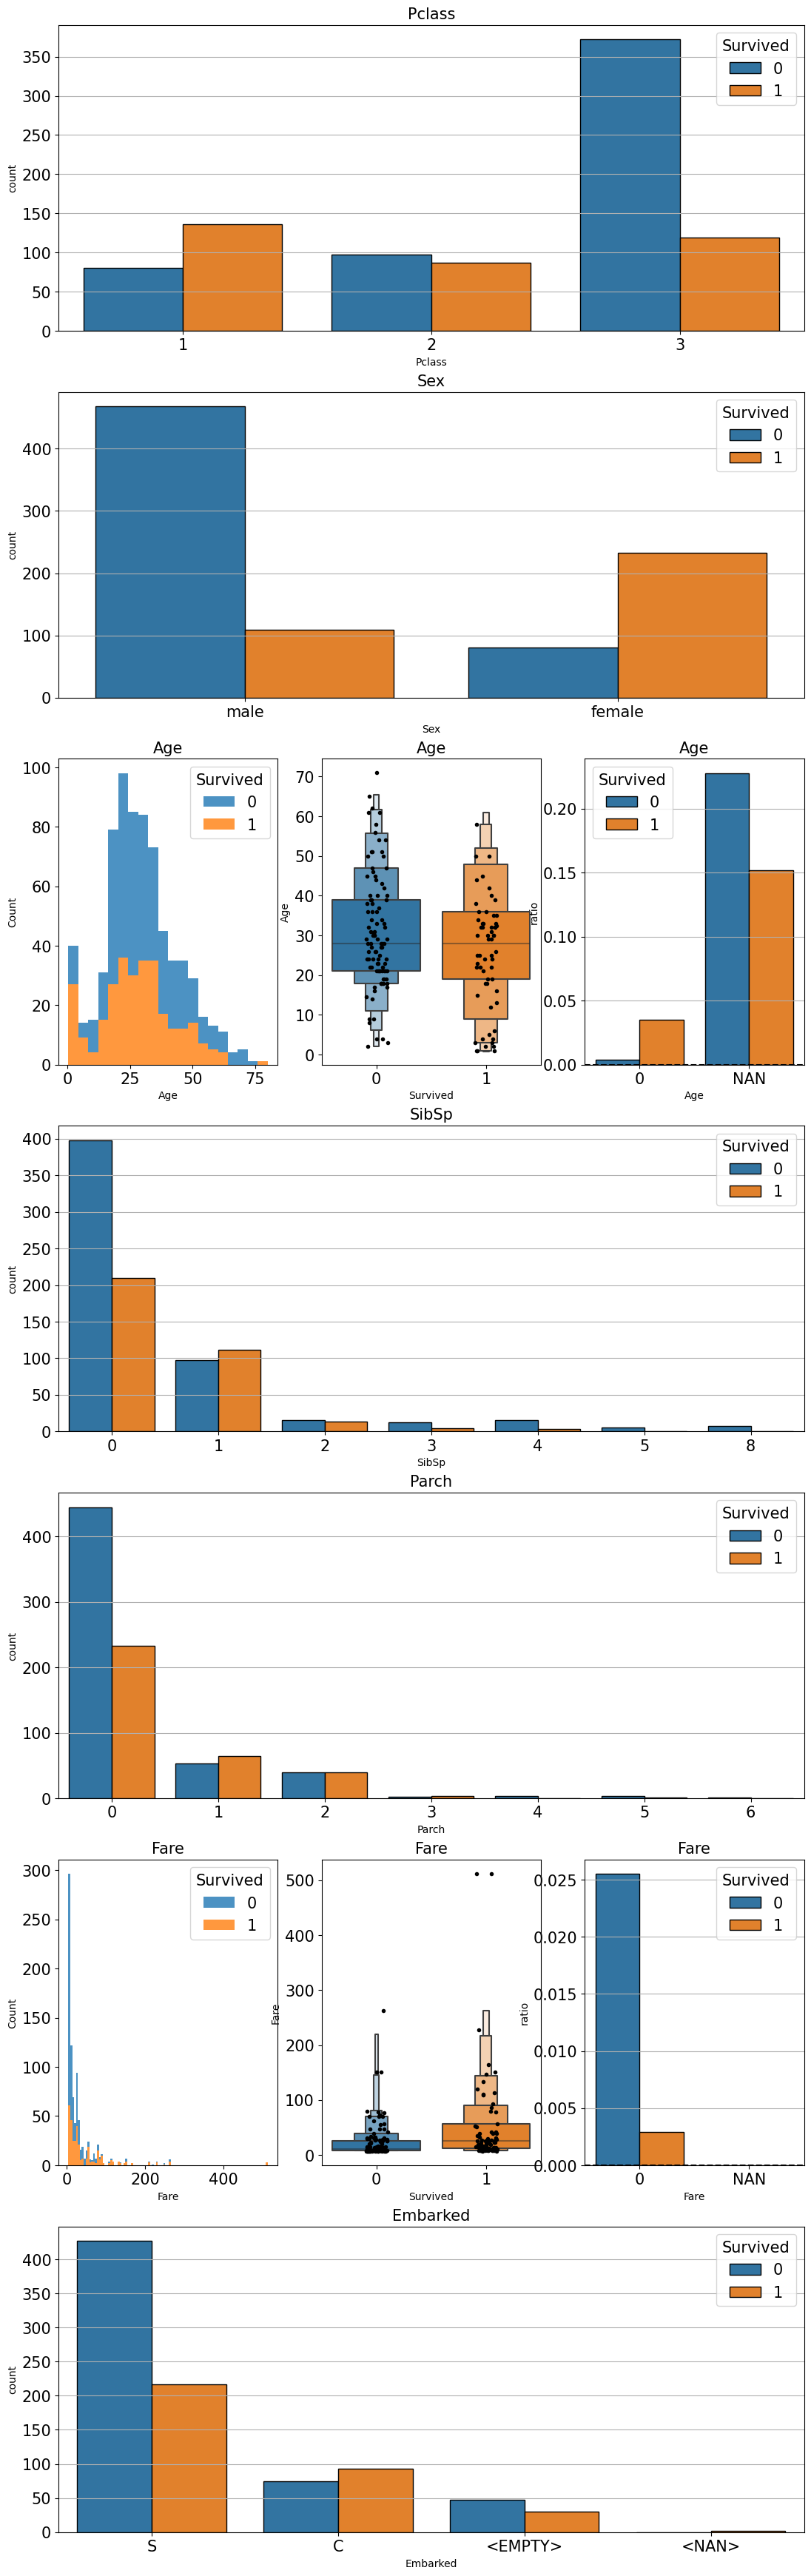

In [68]:
plot_density(df, hue='Survived', cols=df.columns)

In [69]:
from IPython.display import Image 

Image(url="plot.jpeg", width=1000, height=1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
################################################################################


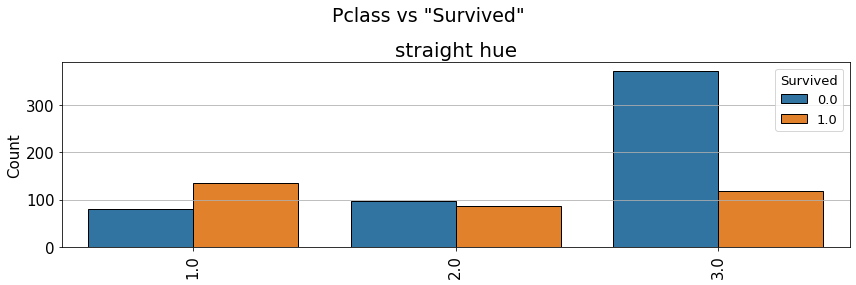

################################################################################


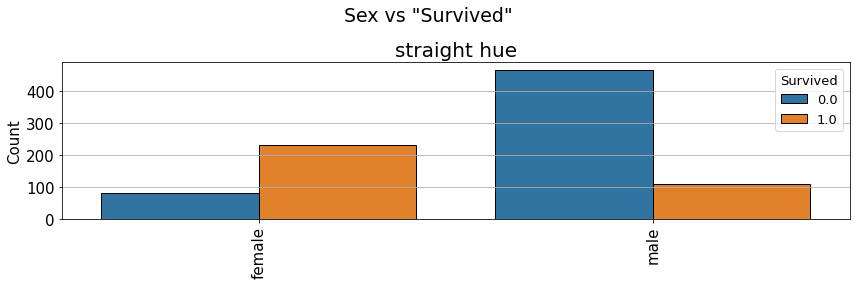

################################################################################


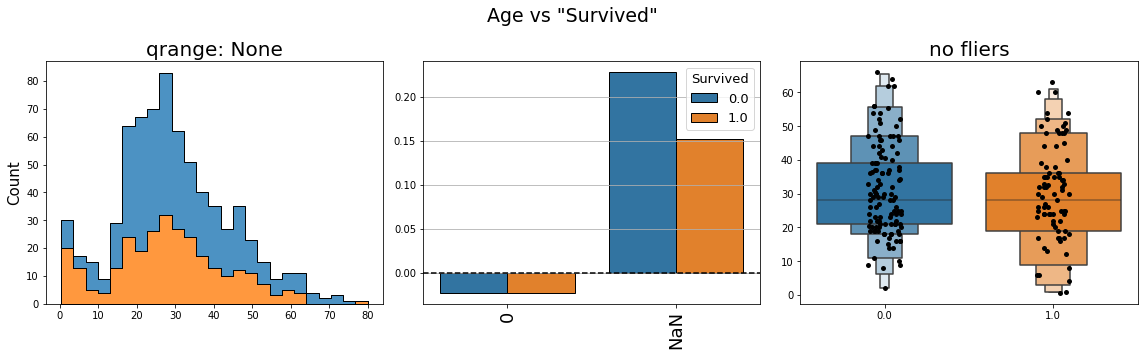

################################################################################


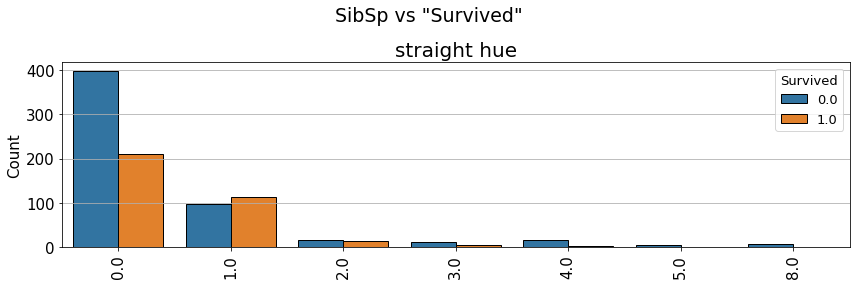

################################################################################


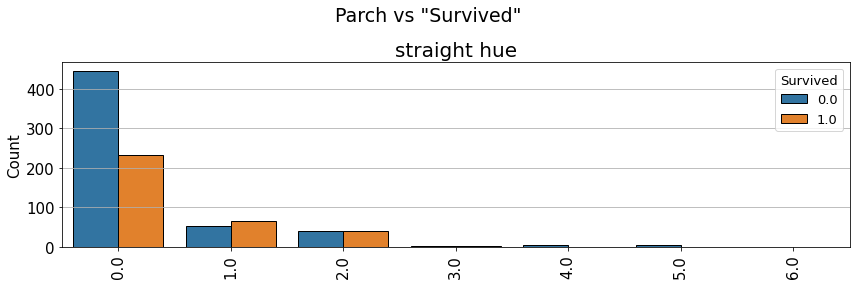

################################################################################


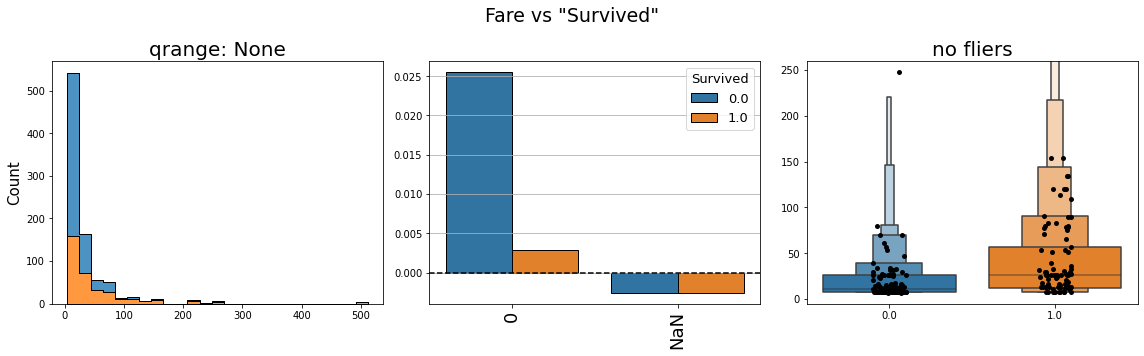

################################################################################


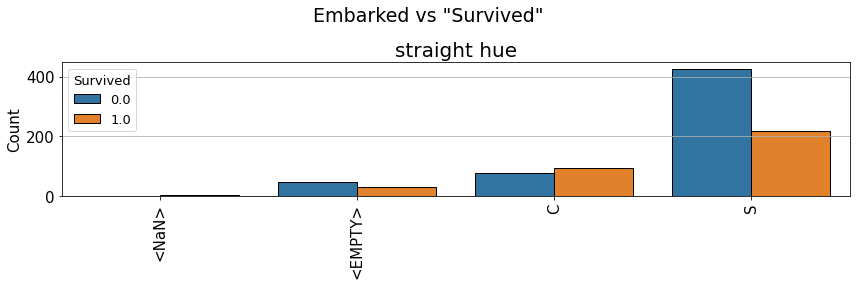

################################################################################


In [ ]:
# Это пример, не запускайте эту ячейку

# WARNING: пример не обязан соблюдать все пункты задания, но вы обязаны :)

plot_density(df, hue='Survived')

***Вопрос:*** Как вы думаете, какие проблемы с этой рисовалкой могут возникнуть при применении ее на других датасетах?

Главная проблема рисовалки заключается в том, что мы используем знания о дадасете, когда выделяем числовые и категориальные признаки. Мы получим нерелеватный результат, если у нас числовой признак будет записан в формате строк. Также у нас будут некорретные графики, если категориальный признак будет состоять из чисел с плавающей точкой. Оба примера выше, в целом, можно исправиить, посмотрев на вывод функции из задачи один на новом датасете.